In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automatic-ticket-classification/complaints-2021-05-14_08_16_.json
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results__.html
/kaggle/input/automatic-ticket-classification-case-study-nlp/__resultx__.html
/kaggle/input/automatic-ticket-classification-case-study-nlp/__notebook__.ipynb
/kaggle/input/automatic-ticket-classification-case-study-nlp/__output__.json
/kaggle/input/automatic-ticket-classification-case-study-nlp/custom.css
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results___files/__results___153_1.png
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results___files/__results___130_1.png
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results___files/__results___61_0.png
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results___files/__results___147_1.png
/kaggle/input/automatic-ticket-classification-case-study-nlp/__results___files/__results___133_1.png
/kaggle/input/automatic-ticket-

In [2]:
import json
f=open("/kaggle/input/automatic-ticket-classification/complaints-2021-05-14_08_16_.json")
data=json.load(f)
data=pd.json_normalize(data)

In [3]:
data.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
data.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [5]:
data.shape

(78313, 22)

In [6]:
df=data[['_source.complaint_what_happened','_source.product','_source.sub_product']]
df.head(5)

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [7]:
df=df.rename(columns={'_source.complaint_what_happened':'complaint_text','_source.product':'category','_source.sub_product':'subcategory'})
df.head(5)

,complaint_text,category,subcategory
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [8]:
df['category']=df['category']+'+'+df['subcategory']
df.drop(['subcategory'],axis=1,inplace=True)
df.head(5)

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [9]:
df.complaint_text.isnull().sum()

0

In [10]:
df[df.complaint_text=='']=np.nan
df.isnull().sum()

complaint_text    57241
category          59350
dtype: int64

In [11]:
df=df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [12]:
df.shape

(21072, 2)

In [13]:
import re
import string

In [14]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub(r'\[.*?\]', '', text).strip()  # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\S*\d\S*\s*', '', text).strip()  # Remove words containing numbers
    return text.strip()

In [15]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
Name: complaint_text, dtype: object

In [16]:
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()

In [17]:
stopwords=nlp.Defaults.stop_words
def lemmatizer(text):
    doc=nlp(text)
    sent=[token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [18]:
from tqdm import tqdm
tqdm.pandas()

In [19]:
df['lemma']=df.complaint_text.progress_apply(lambda x: lemmatizer(x))
df.head()

100%|██████████| 21072/21072 [16:14<00:00, 21.63it/s]


,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [20]:
df_clean=df[['complaint_text','lemma','category']]
df_clean.head(5)

,complaint_text,lemma,category
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account


In [21]:
def extract_pos_tags(text):
    doc=nlp(text)
    sent=[token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [22]:
df_clean['complaint_POS_removed']=df_clean.lemma.progress_apply(lambda x: extract_pos_tags(x))
df_clean.head(5)

100%|██████████| 21072/21072 [08:41<00:00, 40.39it/s]


,complaint_text,lemma,category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([9.233e+03, 6.352e+03, 2.729e+03, 1.271e+03, 7.640e+02, 2.730e+02,
        1.510e+02, 7.200e+01, 6.400e+01, 3.900e+01, 3.700e+01, 1.300e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   248.5,   497. ,   745.5,   994. ,  1242.5,  1491. ,
         1739.5,  1988. ,  2236.5,  2485. ,  2733.5,  2982. ,  3230.5,
         3479. ,  3727.5,  3976. ,  4224.5,  4473. ,  4721.5,  4970. ,
         5218.5,  5467. ,  5715.5,  5964. ,  6212.5,  6461. ,  6709.5,
         6958. ,  7206.5,  7455. ,  7703.5,  7952. ,  8200.5,  8449. ,
         8697.5,  894

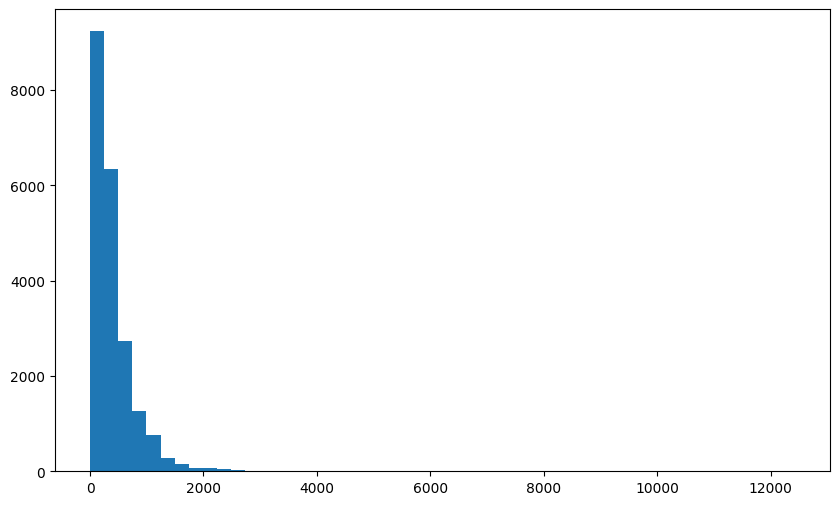

In [24]:
plt.figure(figsize=(10,6))
docs_lens=[len(d) for d in df_clean.complaint_POS_removed]
plt.hist(docs_lens,bins=50)

In [25]:
from wordcloud import WordCloud

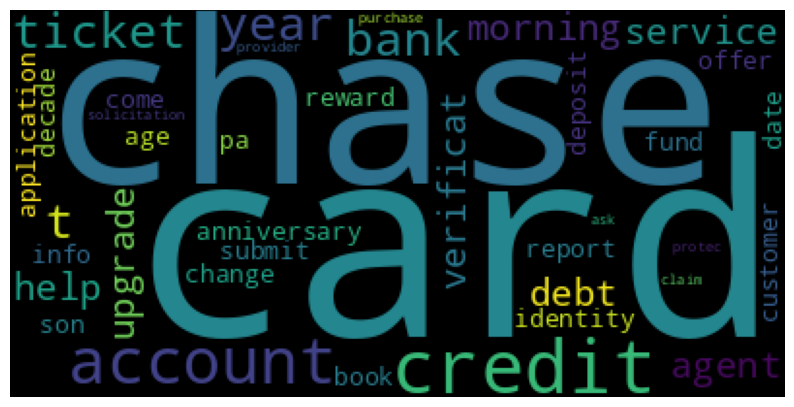

In [26]:
wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))
print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...


In [33]:
vectorizer = CountVectorizer(ngram_range=(1,1),stop_words='english')
X = vectorizer.fit_transform(df_clean.Complaint_clean)
X

<21072x14271 sparse matrix of type '<class 'numpy.int64'>'
	with 675411 stored elements in Compressed Sparse Row format>

In [34]:
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
ngram_df.head(5)

,aaa,aaccount,aacount,aarp,abandonde,abandonment,abate,abatement,abbreviation,abd,...,zap,zeal,zeroliability,zilch,zip,zipcodeaddress,zombie,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
ngram_freq=ngram_df.sum(axis=0).sort_values(ascending=False)
ngram_freq

chase                  53450
account                40983
credit                 33565
xxxx                   31308
card                   29856
                       ...  
inflexibility              1
inflight                   1
influencer                 1
infographic                1
liabilitydisability        1
Length: 14271, dtype: int64

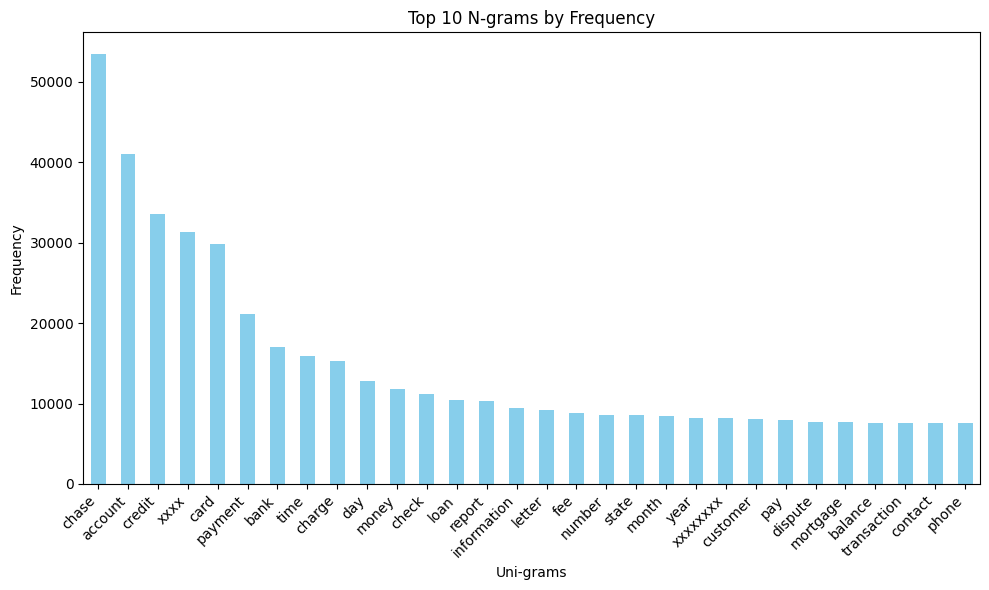

In [44]:
top_unigrams = ngram_freq.head(30)  # Adjust to plot more if needed
plt.figure(figsize=(10, 6))
top_unigrams.plot(kind='bar', color='skyblue')
plt.title("Top 10 N-grams by Frequency")
plt.xlabel("Uni-grams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

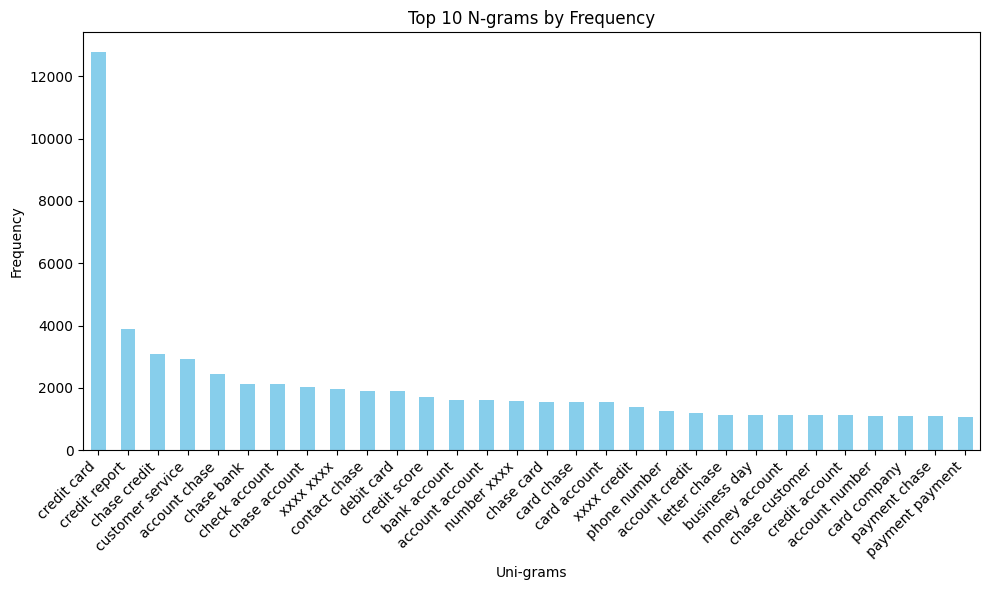

In [46]:
vectorizer = CountVectorizer(ngram_range=(2,2),stop_words='english')
Y = vectorizer.fit_transform(df_clean.Complaint_clean)
ngram_df = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())
ngram_freq=ngram_df.sum(axis=0).sort_values(ascending=False)
top_bigrams = ngram_freq.head(30)  # Adjust to plot more if needed
plt.figure(figsize=(10, 6))
top_bigrams.plot(kind='bar', color='skyblue')
plt.title("Top 10 N-grams by Frequency")
plt.xlabel("Uni-grams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

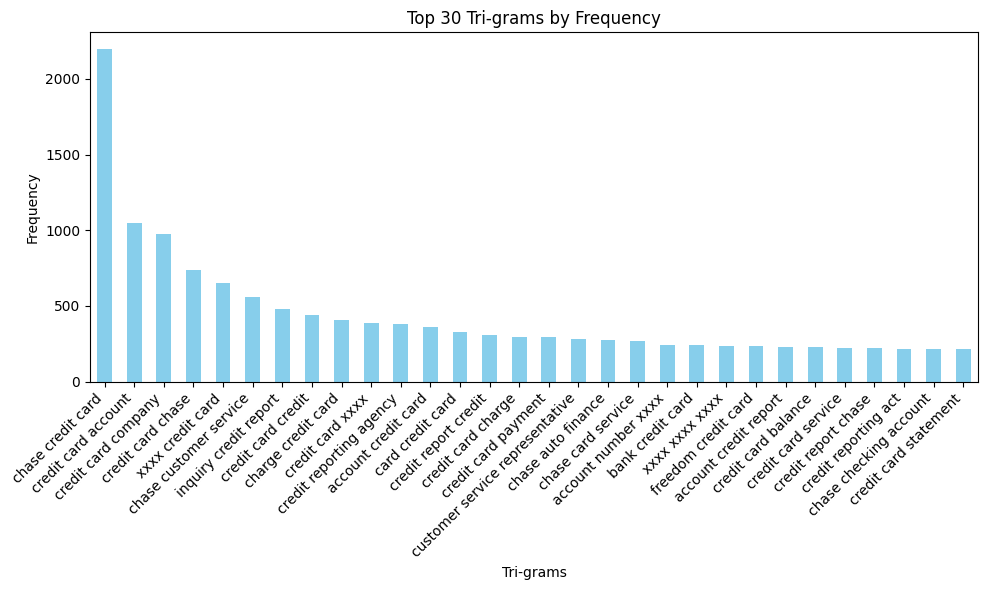

In [47]:
vectorizer = CountVectorizer(ngram_range=(3,3),stop_words='english')
Z = vectorizer.fit_transform(df_clean.Complaint_clean)
ngram_df = pd.DataFrame(Z.toarray(), columns=vectorizer.get_feature_names_out())
ngram_freq=ngram_df.sum(axis=0).sort_values(ascending=False)
top_trigrams = ngram_freq.head(30)  # Adjust to plot more if needed
plt.figure(figsize=(10, 6))
top_trigrams.plot(kind='bar', color='skyblue')
plt.title("Top 30 Tri-grams by Frequency")
plt.xlabel("Tri-grams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [49]:
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [57]:
dtm = tfidf.fit_transform(df_clean.Complaint_clean) 

In [59]:
tfidf.get_feature_names_out()[:10]

array(['aarp', 'abandonment', 'abatement', 'abbreviation', 'abd',
       'abhorrent', 'abide', 'ability', 'abovementione', 'abovereference'],
      dtype=object)

In [61]:
len(tfidf.get_feature_names_out())

6485

In [62]:
from sklearn.decomposition import NMF

In [63]:
num_topics =  5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [65]:
num_words=15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [66]:
vocab

array(['aarp', 'abandonment', 'abatement', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [67]:
topics

['account check money bank deposit chase fund day branch transfer number business transaction customer claim',
 'card credit chase balance account score limit year purchase point month application service reason time',
 'payment loan mortgage chase month modification time home pay year rate balance property statement date',
 'report inquiry credit information company reporting debt account file identity remove dispute theft score letter',
 'charge dispute fee chase transaction merchant claim purchase refund fraud service email time contact statement']

In [68]:
colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.03,0.00,0.02,0.02,0.01,0
Doc1,0.01,0.02,0.00,0.00,0.01,1
Doc2,0.00,0.03,0.00,0.04,0.00,3
Doc3,0.02,0.03,0.01,0.05,0.01,3
Doc4,0.07,0.00,0.01,0.00,0.00,0


In [69]:
df_clean['Topic'] = significant_topic

In [71]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==4].head(30)

,complaint_text,Complaint_clean,category,Topic
21,on xxxx i made a payment to an online retailer...,payment retailer chase pay website scam websi...,"Money transfer, virtual currency, or money ser...",4
30,to whom it may concern chase bank charged wron...,concern bank overdraft fee alert balance fee b...,Checking or savings account+Checking account,4
40,xxxx xxxx a sofa love seat table and chairs an...,seat table chair deliver debit card charge ban...,Checking or savings account+Checking account,4
45,i made a purchase with xxxx xxxx xxxx on in th...,transaction place dispute case chase bank not...,Checking or savings account+Checking account,4
48,jp morgan chase bank please answer the followi...,answer follow question information reason a...,Checking or savings account+Checking account,4
63,i tried to send almost at xxxx and the transac...,transaction charge receive service refund card...,Checking or savings account+Checking account,4
78,my dispute is for not receiving services liste...,dispute service list night city tour tour reas...,Credit card or prepaid card+General-purpose cr...,4
88,i preordered an item on xxxxxxxx and paid with...,item chase credit card merchant estimate prod...,Credit card or prepaid card+General-purpose cr...,4
101,i purchase is an airline ticket on xxxxxxxx an...,airline ticket dollar airport call ticket hou...,Checking or savings account+Checking account,4
129,this complaint is a follow up regarding a comp...,complaint file complaint dispute detail laptop...,Credit card or prepaid card+General-purpose cr...,4


In [74]:
print(len(df_clean[df_clean['Topic']==0]))
print(len(df_clean[df_clean['Topic']==1]))
print(len(df_clean[df_clean['Topic']==2]))
print(len(df_clean[df_clean['Topic']==3]))

5781
4147
5066
2176


In [75]:
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)

In [76]:
df_clean.head()

,complaint_text,lemma,category,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...,Bank Account services
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...,Credit card or prepaid card
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...,Theft/Dispute Reporting
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...,Bank Account services


<Axes: xlabel='Topic', ylabel='count'>

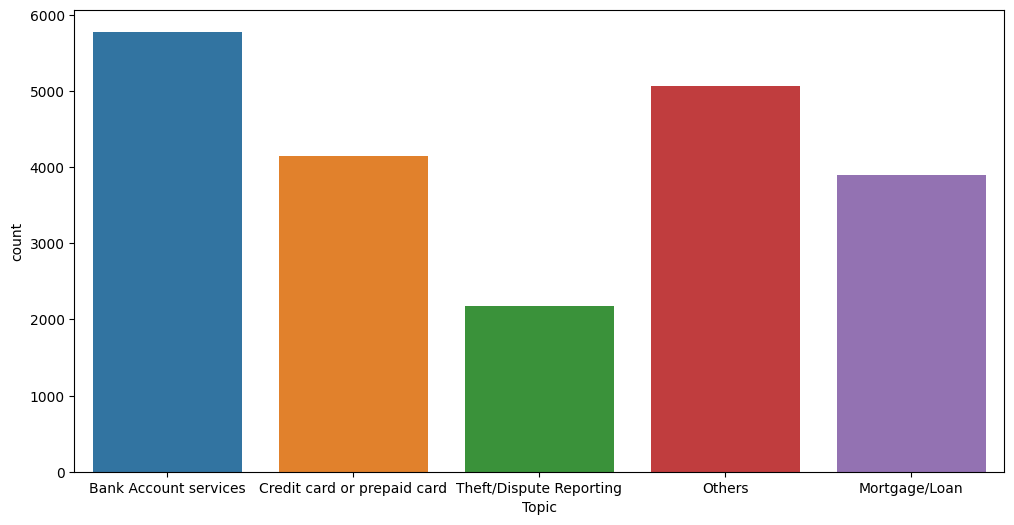

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)

In [78]:
training_data = df_clean[['complaint_text','Topic']]

In [80]:
reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,complaint_text,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in and was told b...,1
10,chase card was reported on however fraudulent ...,3
11,on while trying to book a xxxx xxxx ticket i...,3
14,my grand son give me check for i deposit it in...,0


In [81]:
X = training_data.complaint_text
y = training_data.Topic

In [82]:
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [84]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [86]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 128 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(len(reverse_topic_mapping), activation='softmax')  # Output layer (number of classes)
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=10, 
    batch_size=32, 
    verbose=2
)

Epoch 1/10
396/396 - 16s - 40ms/step - accuracy: 0.7497 - loss: 0.6961 - val_accuracy: 0.8655 - val_loss: 0.3533
Epoch 2/10
396/396 - 14s - 36ms/step - accuracy: 0.9464 - loss: 0.1705 - val_accuracy: 0.8826 - val_loss: 0.3267
Epoch 3/10
396/396 - 14s - 35ms/step - accuracy: 0.9855 - loss: 0.0573 - val_accuracy: 0.8814 - val_loss: 0.3513
Epoch 4/10
396/396 - 14s - 36ms/step - accuracy: 0.9948 - loss: 0.0258 - val_accuracy: 0.8773 - val_loss: 0.3966
Epoch 5/10
396/396 - 13s - 34ms/step - accuracy: 0.9981 - loss: 0.0124 - val_accuracy: 0.8807 - val_loss: 0.4333
Epoch 6/10
396/396 - 14s - 35ms/step - accuracy: 0.9987 - loss: 0.0092 - val_accuracy: 0.8716 - val_loss: 0.4788
Epoch 7/10
396/396 - 14s - 35ms/step - accuracy: 0.9991 - loss: 0.0063 - val_accuracy: 0.8633 - val_loss: 0.5360
Epoch 8/10
396/396 - 14s - 34ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.8712 - val_loss: 0.5303
Epoch 9/10
396/396 - 14s - 34ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.8731 - 

In [87]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred = model.predict(X_test)

Test Accuracy: 0.87
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [95]:
def predict(test_case):
    y=model.predict(test_case)
    return topic_mapping[y[0].argmax()]

In [96]:
predict(X_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


'Mortgage/Loan'

In [115]:
# Step 1: Preprocess the Text
text_sample = "I want a loan of rupees 400000 from Axis bank"
text_sample = clean_text(text_sample)  # Clean the text

# Create a DataFrame for the sample
sample_df = pd.DataFrame([text_sample], columns=['complaint_text'])

# Apply lemmatization
sample_df['lemma'] = sample_df['complaint_text'].apply(lambda x: lemmatizer(x))

# Extract POS tags
sample_df['complaint_POS_removed'] = sample_df['lemma'].apply(lambda x: extract_pos_tags(x))

# Get the processed text
processed_text = sample_df['complaint_POS_removed'].iloc[0]

# Step 2: Vectorize the Processed Text
# Ensure the CountVectorizer or TfidfVectorizer used during training is available
sample_vect = count_vect.transform([processed_text])  # Use the same vectorizer instance as during training

# Transform to TF-IDF (if used during training)
sample_tfidf = tfidf_transformer.transform(sample_vect)

# Step 3: Make Predictions Using the Model
predicted_class_index = model.predict(sample_tfidf).argmax(axis=1)[0]

# Step 4: Map the Predicted Index Back to the Topic Name
reverse_topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

predicted_topic = reverse_topic_mapping[predicted_class_index]

# Display the Result
print(f"Predicted Topic: {predicted_topic}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Topic: Others
